In [0]:
%python
print("Om Sri Sairam ...!!!")

Om Sri Sairam ...!!!

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import os
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [0]:

!gdown --id 1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn- 
!gdown --id 1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8

Downloading...
From: https://drive.google.com/uc?id=1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn-
To: /databricks/driver/Fresh.zip
0.00B [00:00, ?B/s]4.72MB [00:00, 17.1MB/s]23.1MB [00:00, 73.9MB/s]34.6MB [00:00, 51.4MB/s]43.0MB [00:00, 56.2MB/s]50.9MB [00:00, 54.6MB/s]65.5MB [00:01, 75.3MB/s]75.0MB [00:01, 67.9MB/s]87.6MB [00:01, 80.9MB/s]97.5MB [00:01, 72.7MB/s]110MB [00:01, 82.8MB/s] 119MB [00:01, 80.6MB/s]135MB [00:01, 99.3MB/s]146MB [00:02, 83.4MB/s]160MB [00:02, 57.0MB/s]172MB [00:02, 69.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8
To: /databricks/driver/Withered.zip
0.00B [00:00, ?B/s]1.05MB [00:00, 6.79MB/s]2.62MB [00:00, 9.58MB/s]4.72MB [00:00, 13.0MB/s]7.86MB [00:00, 18.8MB/s]12.6MB [00:00, 27.7MB/s]20.4MB [00:00, 43.4MB/s]32.0MB [00:00, 64.7MB/s]48.2MB [00:00, 93.3MB/s]67.1MB [00:01, 122MB/s] 86.0MB [00:01, 142MB/s]105MB [00:01, 155MB/s] 124MB [00:01, 166MB/s]143MB [00:01, 172MB/s]162MB [00:01, 177MB/s]181MB [00:01, 180MB/s]200MB [00:01, 182MB/s]219MB [00:01, 183MB/s]230MB [00:01, 122MB/s]

In [0]:
import zipfile
local_zip = '/databricks/driver/Fresh.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/databricks/driver/tealeaf/content')
#zip_ref.extractall('/FileStore/tables/tealeaf/content')
zip_ref.close()

local_zip = '/databricks/driver/Withered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/databricks/driver/tealeaf/content')
#zip_ref.extractall('/FileStore/tables/tealeaf/content')
zip_ref.close()

In [0]:
print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Below Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Poor')))

73
153
43

In [0]:
def assembleModels():
    model1 = tf.keras.applications.MobileNetV3Large(input_shape=(224,224,3), include_top=False, weights="imagenet", pooling = 'avg') 
    M1 = tf.keras.models.Sequential([
                                 model1,
                                 tf.keras.layers.Dense(3, activation='softmax')
])
    model2 = tf.keras.applications.Xception(input_shape=(224,224,3), include_top=False, weights="imagenet", pooling = 'avg')
    M2 = tf.keras.models.Sequential([
                                 model2,
                                 tf.keras.layers.Dense(3, activation='softmax')
])
    model3 = tf.keras.applications.NASNetMobile(input_shape=(224,224,3), include_top=False, weights="imagenet", pooling = 'max')
    M3 = tf.keras.models.Sequential([
                                 model3,
                                 tf.keras.layers.Dense(3, activation='softmax')
])
    model4 = tf.keras.applications.DenseNet121(input_shape=(224,224,3), include_top=False, weights="imagenet", pooling = 'max')
    M4 = tf.keras.models.Sequential([
                                 model4,
                                 tf.keras.layers.Dense(3, activation='softmax')
])
    return M1,M2,M3,M4

In [0]:
import imgaug as ia
import os
import numpy as np
import imgaug.augmenters as iaa
ia.seed(2)

seq1 = iaa.Sequential([
    iaa.Fliplr(1.0), 
    iaa.Flipud(0.7)
])

seq2 = iaa.Sequential([
    iaa.Affine(rotate=(-60, 60)),
    iaa.Flipud(1.0)
])

seq3 = iaa.PerspectiveTransform(scale=(0.01, 0.15))
seq4 = iaa.Affine(scale=(0.5, 1.5))
seq5 = iaa.LinearContrast((0.4, 1.6))
seq6 = iaa.Sequential([
    iaa.Flipud(1.0), 
    iaa.AllChannelsHistogramEqualization()
])
seq7 = iaa.LogContrast(gain=(0.6, 1.4))

# we use tha above defined augmentations 

'''augmenting the "Best" class:'''

from PIL import Image

count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Fresh/Best'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Fresh/Best",i))
    img = np.array(img)
    
    img1 = seq6(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Fresh/Best/img_{}.jpg".format(count))
    count += 1

    img5 = seq3(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Fresh/Best/img_{}.jpg".format(count))
    count += 1


'''augmenting the "Below Best" class:'''
count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Fresh/Below Best'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Fresh/Below Best",i))
    img = np.array(img)
    
    img1 = seq2(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Fresh/Below Best/img_{}.jpg".format(count))
    count += 1

    img4 = seq4(image=img)
    img4 = Image.fromarray(np.uint8(img4)).convert('RGB')
    img4.save("/databricks/driver/tealeaf/content/Fresh/Below Best/img_{}.jpg".format(count))
    count += 1

    img5 = seq5(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Fresh/Below Best/img_{}.jpg".format(count))
    count += 1

    img6 = seq6(image=img)
    img6 = Image.fromarray(np.uint8(img6)).convert('RGB')
    img6.save("/databricks/driver/tealeaf/content/Fresh/Below Best/img_{}.jpg".format(count))
    count += 1

    img7 = seq7(image=img)
    img7 = Image.fromarray(np.uint8(img7)).convert('RGB')
    img7.save("/databricks/driver/tealeaf/content/Fresh/Below Best/img_{}.jpg".format(count))
    count += 1

'''augmenting the "Poor" class:'''
count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Fresh/Poor'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Fresh/Poor",i))
    img = np.array(img)

    img1 = seq2(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img2 = seq1(image=img)
    img2 = Image.fromarray(np.uint8(img2)).convert('RGB')
    img2.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img3 = seq3(image=img)
    img3 = Image.fromarray(np.uint8(img3)).convert('RGB')
    img3.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img4 = seq4(image=img)
    img4 = Image.fromarray(np.uint8(img4)).convert('RGB')
    img4.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img5 = seq5(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img6 = seq6(image=img)
    img6 = Image.fromarray(np.uint8(img6)).convert('RGB')
    img6.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

    img7 = seq7(image=img)
    img7 = Image.fromarray(np.uint8(img7)).convert('RGB')
    img7.save("/databricks/driver/tealeaf/content/Fresh/Poor/img_{}.jpg".format(count))
    count += 1

print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Below Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Fresh/Poor')))

438
459
344

In [0]:
import tensorflow as tf
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.25,
    shear_range=0.3,
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
        '/databricks/driver/tealeaf/content/Fresh',
        target_size=(224, 224),
        batch_size=8,
        subset='training',
        class_mode='categorical')
validation_generator = datagen.flow_from_directory(
        '/databricks/driver/tealeaf/content/Fresh',
        target_size=(224, 224),
        batch_size=8,
        subset='validation',
        class_mode='categorical')

Found 995 images belonging to 3 classes.
Found 246 images belonging to 3 classes.

In [0]:
x,y = train_generator[0]
print(x.shape)
print(y.shape)

(8, 224, 224, 3)
(8, 3)

In [0]:
class Customed_datagen(tf.keras.utils.Sequence):
    def __init__(self, input_gen):
        self.gen = input_gen

    def __len__(self):
        return len(self.gen)

    def __getitem__(self, i):
        x,y = self.gen[i]
        return [x, x, x, x], y
    
    def y_val(self):
        return self.gen.classes
    
    def on_epoch_end(self):
        self.gen.on_epoch_end()
    
trainer = Customed_datagen(train_generator)
validator = Customed_datagen(validation_generator)

In [0]:
def initialize_model():
    M1,M2,M3,M4 = assembleModels()
    x = tf.keras.layers.concatenate([M1.output,M2.output,M3.output, M4.output])
    #x = tf.keras.layers.Dense(8, activation='leaky_relu')(x)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)
    model = tf.keras.Model([M1.input,M2.input,M3.input, M4.input], x)
    
    return model

In [0]:
def plot_history(history):
    print(" Plot Histrory ....")
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Acc', 'Val Acc'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Val Loss'])
    plt.show()

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
def evaluation(M):
    print(" Model Evaluation ....")
    validation_generator.class_indices
    
    val_gen = datagen.flow_from_directory(
        '/databricks/driver/tealeaf/content/Fresh',
        target_size=(224, 224),
        batch_size=246,
        subset='validation',
        class_mode='categorical')
    
    val_g = Customed_datagen(val_gen)
    x,y = val_g[0]
    
    predicted = M.predict(x)
    predict = np.argmax(predicted, axis=1)
    truth = np.argmax(y, axis=1)
    errors = np.where(predict != truth)
    print('No of errors = {}/{}'.format(len(errors[0]),len(truth)))
    
    y_test = truth
    y_pred = predict
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n')
    print(confusion)

    #importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Below Best', 'Best', 'Poor']))
    
    plot_confusion_matrix(confusion, classes=['Below Best', 'Best', 'Poor'],
                      title='Confusion matrix, with normalization',
                      normalize = True,)
    
    print(" Model Evaluation Completed  ....")


    return

In [0]:
def train_model(trainer , M,validator):
    print(" Train Model ....")
    M.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
    history = M.fit(trainer, validation_data= validator, epochs = 20)
    return history

In [0]:
print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Below Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Poor')))

279
269
273

In [0]:
print('sequential withered data')
seq1 = iaa.Sequential([
    iaa.Fliplr(1.0), 
    iaa.Flipud(0.7)
])

seq2 = iaa.Sequential([
    iaa.Affine(rotate=(-60, 60)),
    iaa.Flipud(1.0)
])

seq3 = iaa.PerspectiveTransform(scale=(0.01, 0.15))
seq4 = iaa.Affine(scale=(0.5, 1.5))
seq5 = iaa.LinearContrast((0.4, 1.6))
seq6 = iaa.Sequential([
    iaa.Flipud(1.0), 
    iaa.AllChannelsHistogramEqualization()
])
seq7 = iaa.LogContrast(gain=(0.6, 1.4))

''' Applying Augmentation for Best Class'''
count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Withered/Best'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Withered/Best",i))
    img = np.array(img)

    img1 = seq2(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img2 = seq1(image=img)
    img2 = Image.fromarray(np.uint8(img2)).convert('RGB')
    img2.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img3 = seq3(image=img)
    img3 = Image.fromarray(np.uint8(img3)).convert('RGB')
    img3.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img4 = seq4(image=img)
    img4 = Image.fromarray(np.uint8(img4)).convert('RGB')
    img4.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img5 = seq5(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img6 = seq6(image=img)
    img6 = Image.fromarray(np.uint8(img6)).convert('RGB')
    img6.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

    img7 = seq7(image=img)
    img7 = Image.fromarray(np.uint8(img7)).convert('RGB')
    img7.save("/databricks/driver/tealeaf/content/Withered/Best/img_{}.jpg".format(count))
    count += 1

''' Applying Augmentation for Below Best Class'''
count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Withered/Below Best'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Withered/Below Best",i))
    img = np.array(img)

    img1 = seq2(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img2 = seq1(image=img)
    img2 = Image.fromarray(np.uint8(img2)).convert('RGB')
    img2.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img3 = seq3(image=img)
    img3 = Image.fromarray(np.uint8(img3)).convert('RGB')
    img3.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img4 = seq4(image=img)
    img4 = Image.fromarray(np.uint8(img4)).convert('RGB')
    img4.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img5 = seq5(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img6 = seq6(image=img)
    img6 = Image.fromarray(np.uint8(img6)).convert('RGB')
    img6.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1

    img7 = seq7(image=img)
    img7 = Image.fromarray(np.uint8(img7)).convert('RGB')
    img7.save("/databricks/driver/tealeaf/content/Withered/Below Best/img_{}.jpg".format(count))
    count += 1


''' Applying Augmentation for Poor Class'''
count = 0
for i in os.listdir('/databricks/driver/tealeaf/content/Withered/Poor'):
    img = Image.open(os.path.join("/databricks/driver/tealeaf/content/Withered/Poor",i))
    img = np.array(img)

    img1 = seq2(image=img)
    img1 = Image.fromarray(np.uint8(img1)).convert('RGB')
    img1.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img2 = seq1(image=img)
    img2 = Image.fromarray(np.uint8(img2)).convert('RGB')
    img2.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img3 = seq3(image=img)
    img3 = Image.fromarray(np.uint8(img3)).convert('RGB')
    img3.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img4 = seq4(image=img)
    img4 = Image.fromarray(np.uint8(img4)).convert('RGB')
    img4.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img5 = seq5(image=img)
    img5 = Image.fromarray(np.uint8(img5)).convert('RGB')
    img5.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img6 = seq6(image=img)
    img6 = Image.fromarray(np.uint8(img6)).convert('RGB')
    img6.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

    img7 = seq7(image=img)
    img7 = Image.fromarray(np.uint8(img7)).convert('RGB')
    img7.save("/databricks/driver/tealeaf/content/Withered/Poor/img_{}.jpg".format(count))
    count += 1

print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Below Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Best')))
print(len(os.listdir('/databricks/driver/tealeaf/content/Withered/Poor')))


sequential withered data
2232
2152
2184

In [0]:
datagen_withered = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.4,
    validation_split=0.2,
)

train_generator_withered = datagen_withered.flow_from_directory(
        '/databricks/driver/tealeaf/content/Withered',
        target_size=(224, 224),
        batch_size=16,
        subset='training',
        class_mode='categorical')
validation_generator_withered = datagen_withered.flow_from_directory(
        '/databricks/driver/tealeaf/content/Withered',
        target_size=(224, 224),
        batch_size=16,
        subset='validation',
        class_mode='categorical')

Found 5256 images belonging to 3 classes.
Found 1312 images belonging to 3 classes.

In [0]:
x,y = train_generator_withered[0]
print(x.shape)
print(y.shape)

(16, 224, 224, 3)
(16, 3)

In [0]:
trainer_withered = Customed_datagen(train_generator_withered)
validator_withered = Customed_datagen(validation_generator_withered)

In [0]:
def train_model_withered_Adam(trainer , M,validator):
    print(" FUNCTION : train_model_withered_Adam....")
    M.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
    history_Adam = M.fit(trainer, validation_data= validator, epochs = 26)
    return history_Adam

In [0]:
def train_model_withered_RMSprop(trainer , M,validator):
    print("  FUNCTION : train_model_withered_RMSprop ....")
    M.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5), metrics=['accuracy'])
    history_RMSprop = M.fit(trainer, validation_data= validator, epochs = 4)
    return history_RMSprop

In [0]:
def plot_history_withered(history_Adam,history_RMSprop):
    print(" FUNCTION : plot_history_withered....")
    plt.style.use("ggplot")
    fig = plt.gcf()
    fig.set_size_inches(6, 4)
    
    acc = history_Adam.history['accuracy'] + history_RMSprop.history['accuracy']
    val_acc = history_Adam.history['val_accuracy'] + history_RMSprop.history['val_accuracy']
    loss = history_Adam.history['loss'] + history_RMSprop.history['loss']
    val_loss = history_Adam.history['val_loss'] + history_RMSprop.history['val_loss']

    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train Acc', 'Val Acc'], loc='lower right')
    plt.show()

    fig = plt.gcf()
    fig.set_size_inches(6, 4)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train Loss', 'Val Loss'])
    plt.show()


In [0]:
def evaluation_withered(M):
    print(" FUNCTION : evaluation_withered....")
    val_gen = datagen_withered.flow_from_directory(
        '/databricks/driver/tealeaf/content/Withered',
        target_size=(224, 224),
        batch_size=1312,
        subset='validation',
        class_mode='categorical')
    
    val_g = Customed_datagen(val_gen)
    x,y = val_g[0]
    
    predicted = M.predict(x)
    predict = np.argmax(predicted, axis=1)
    truth = np.argmax(y, axis=1)
    errors = np.where(predict != truth)
    
    print('No of errors = {}/{}'.format(len(errors[0]),len(truth)))
    
    y_test = truth
    y_pred = predict
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n')
    print(confusion)

    #importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['Below Best', 'Best', 'Poor']))
    
    plt.style.use("classic")
    plot_confusion_matrix(confusion, classes=['Below Best', 'Best', 'Poor'],
                      title='Withered: Confusion matrix, with normalization',
                      normalize = True,)
    

ML Flow START ==>
/databricks/python/lib/python3.8/site-packages/mlflow/utils/autologging_utils/__init__.py:411: FutureWarning: Autologging support for keras >= 2.6.0 has been deprecated and will be removed in a future MLflow release. Use `mlflow.tensorflow.autolog()` instead.
 return _autolog(*args, **kwargs)
Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v3/weights_mobilenet_v3_large_224_1.0_float_no_top.h5
 16384/17605208 [..............................] - ETA: 4s 434176/17605208 [..............................] - ETA: 2s 8421376/17605208 [=============>................] - ETA: 0s17612800/17605208 [==============================] - 0s 0us/step
17620992/17605208 [==============================] - 0s 0us/step
Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/xception/xception_weights_tf_dim_ordering_tf_kernels_notop.h5
 16384/83683744 [..............................] - ETA: 8s 270336/83683744 [..............................] - ETA: 16s 843776/83683744 [..............................] - ETA: 10s 1671168/83683744 [..............................] - ETA: 7s  2662400/83683744 [..............................] - ETA: 6s 3850240/83683744 [>.............................] - ETA: 5s 5251072/83683744 [>.............................] - ETA: 4s 6963200/83683744 [=>............................] - ETA: 3s 9093120/83683744 [==>...........................] - ETA: 3s11845632/83683744 [===>..........................] - ETA: 2s14663680/83683744 [====>.........................] - ETA: 2s17137664/83683744 [=====>........................] - ETA: 2s19628032/83683744 [======>.......................] - ETA: 1s22069248/83683744 [======>.......................] - ETA: 1s24526848/83683744 [=======>......................] - ETA: 1s26992640/83683744 [========>.....................] - ETA: 1s29450240/83683744 [=========>....................] - ETA: 1s32407552/83683744 [==========>...................] - ETA: 1s35790848/83683744 [===========>..................] - ETA: 1s39305216/83683744 [=============>................] - ETA: 1s42819584/83683744 [==============>...............] - ETA: 0s47276032/83683744 [===============>..............] - ETA: 0s51978240/83683744 [=================>............] - ETA: 0s56705024/83683744 [===================>..........] - ET

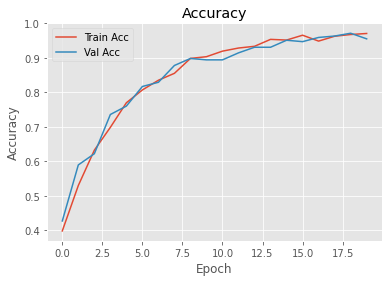

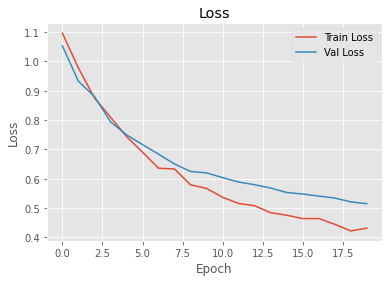

Model Evaluation ....
Found 246 images belonging to 3 classes.
No of errors = 13/246
Confusion Matrix

[[86 0 1]
 [ 1 88 2]
 [ 7 2 59]]

Accuracy: 0.95


Classification Report

 precision recall f1-score support

 Below Best 0.91 0.99 0.95 87
 Best 0.98 0.97 0.97 91
 Poor 0.95 0.87 0.91 68

 accuracy 0.95 246
 macro avg 0.95 0.94 0.94 246
weighted avg 0.95 0.95 0.95 246

Normalized confusion matrix
[[0.98850575 0. 0.01149425]
 [0.01098901 0.96703297 0.02197802]
 [0.10294118 0.02941176 0.86764706]]
 Model Evaluation Completed ....
ML Flow - Fresh Leaf - DONE ==>
ML Flow - Withered Leaf START ==>
 FUNCTION : train_model_withered_Adam....
2021/10/06 21:35:35 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during keras autologging: INVALID_PARAMETER_VALUE: Parameter with key epochs was already logged with a value of 20. The attempted new value was 26
Epoch 1/26
 1/329 [..............................] - ETA: 3:48:36 - loss: 1.0962 - accuracy: 0.4375 2/329 [..............................] - ETA: 10:15 - loss: 1.1418 - accuracy: 0.4062  3/329 [..............................] - ETA: 10:06 - loss: 1.0864 - accuracy: 0.4792 4/329 [..............................] - ETA: 10:01 - loss: 1.1226 - accuracy: 0.4219 5/329 [..............................] - ETA: 9:59 - loss: 1.1221 - accuracy: 0.4250  6/329 [..............................] - ETA: 9:54 - loss: 1.1394 - accuracy: 0.4167 7/329 [..............................] - ETA: 9:51 - loss: 1.1629 - accuracy: 0.3750 8/329 [..............................] - ETA: 9:48 - loss: 1.1879 - accuracy: 0.3750 9/329 [..............................] - ETA: 9:45 - loss: 1.1809 - accuracy: 0.3750 10/329 [..............................] - ETA: 9:42 - loss: 1.1869 - accuracy: 0.3688 11/329 [>.............................] - ETA: 9:40 - loss: 1.1600 - accuracy: 0.3864 12/329 [>.............................] - ETA: 9:38 - loss: 1.1497 - accuracy: 0.3958 13/329 [>.............................] - ETA: 9:36 - loss: 1.1622 - accuracy: 0.3894 14/329 [>.............................] - ETA: 9:34 - loss: 1.1615 - accuracy: 0.3973 15/329 [>.............................] - ETA: 9:32 - loss: 1.1584 - accuracy: 0.4000 16/329 [>.............................] - ETA: 9:30 - loss: 1.1561 - accuracy: 0.3984 17/329 [>.............................] - ETA: 9:28 - loss: 1.1651 - accuracy: 0.3971 18/329 [>.............................] - ETA: 9:26 - loss: 1.1712 - accuracy: 0.3889

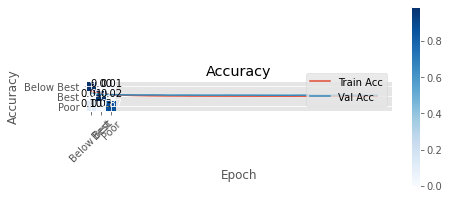

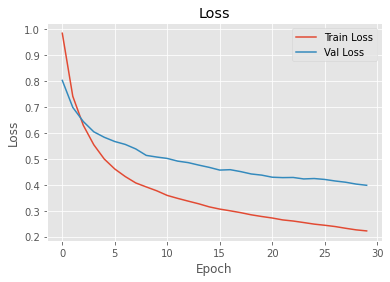

FUNCTION : evaluation_withered....
Found 1312 images belonging to 3 classes.
No of errors = 116/1312
Confusion Matrix

[[383 23 40]
 [ 14 409 7]
 [ 22 10 404]]

Accuracy: 0.91


Classification Report

 precision recall f1-score support

 Below Best 0.91 0.86 0.89 446
 Best 0.93 0.95 0.94 430
 Poor 0.90 0.93 0.91 436

 accuracy 0.91 1312
 macro avg 0.91 0.91 0.91 1312
weighted avg 0.91 0.91 0.91 1312

Normalized confusion matrix
[[0.85874439 0.05156951 0.0896861 ]
 [0.03255814 0.95116279 0.01627907]
 [0.05045872 0.02293578 0.9266055 ]]
ML Flow - Withered Leaf - DONE ==>
 Om Sri Sairam ...!!! ... Happy Holidays ...

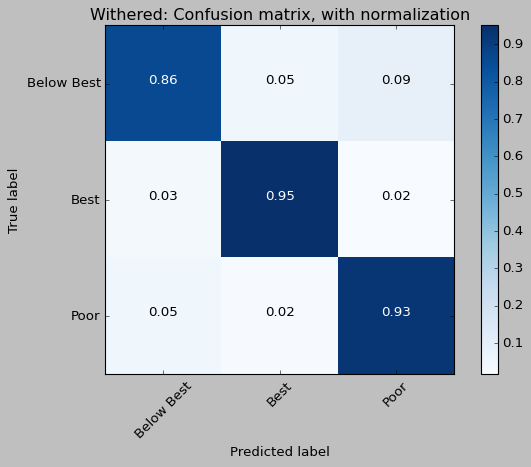

In [0]:
import mlflow
import mlflow.keras

with mlflow.start_run():
    
    #Automatically catch the model's parameters, metrics, artifacts
    #and source code with the autolog() function
    print("ML Flow START ==>")
    mlflow.keras.autolog()
    #mlflow.tensorflow.autolog()
    M = initialize_model()
    
    # Fresh Leaf 
    print("ML Flow - Fresh Leaf START ==>")
    history = train_model(trainer,M,validator)
    plot_history(history)
    evaluation(M)
    
    print("ML Flow - Fresh Leaf - DONE ==>")
    
    # Withered Leaf 
    print("ML Flow - Withered Leaf START ==>")
    history_Adam = train_model_withered_Adam(trainer_withered,M,validator_withered)
    
    history_RMSprop = train_model_withered_RMSprop(trainer_withered,M,validator_withered)
    
    plot_history_withered(history_Adam,history_RMSprop)
        
    evaluation_withered(M)
    print("ML Flow - Withered Leaf - DONE ==>")
    print(" Om Sri Sairam ...!!! ... Happy Holidays ...")
    
    
    

In [0]:
from tensorflow.keras.applications import InceptionV3

M.save('/tmp/tealeaf_model_full.h5')
dbutils.fs.cp("file:/tmp/tealeaf_model_full.h5","dbfs:/FileStore/tables/tealeaf/model/tealeaf_model/tealeaf_model_full.h5")

#display(dbutils.fs.ls("tmp/tealeaf_model_full.h5"))
#keras_model_path = '/FileStore/tables/tealeaf/model/tealeaf_model'
#mlflow.keras.save_model(M, keras_model_path)

--------------------------------------------------------------------------- 
 ExecutionError Traceback (most recent call last)
 <command-724759400575463> in <module> 
 3 #M.save('/tmp/tealeaf_model_full.h5') 
 4 #dbutils.fs.cp("file:/tmp/tealeaf_model_full.h5","dbfs:/FileStore/tables/tealeaf/model/tealeaf_model/tealeaf_model_full.h5") 
 ----> 5 dbutils . fs . cp ( "file:/tmp/tealeaf_model_full.h5" , "s3:/FileStore/tealeaf/model/tealeaf_model_full.h5" ) 
 6 #display(dbutils.fs.ls("tmp/tealeaf_model_full.h5")) 
 7 #keras_model_path = '/FileStore/tables/tealeaf/model/tealeaf_model' 

 /databricks/python_shell/dbruntime/dbutils.py in f_with_exception_handling (*args, **kwargs) 
 318 exc . __context__ = None 
 319 exc . __cause__ = None 
 --> 320 raise exc
 321 return f_with_exception_handling
 322 

 ExecutionError : An error occurred while calling z:com.databricks.backend.daemon.dbutils.FSUtils.cp.
: java.lang.NullPointerException: null uri host.
	at java.util.Objects.requireNonNull(Objects.java:228)
	at shaded.databricks.org.apache.hadoop.fs.s3native.S3xLoginHelper.buildFSURI(S3xLoginHelper.java:72)
	at shaded.databricks.org.apache.hadoop.fs.s3a.S3AFileSystem.setUri(S3AFileSystem.java:772)
	at shaded.databricks.org.apache.hadoop.fs.s3a.S3AFileSystem.initialize(S3AFileSystem.java:399)
	at org.apache.hadoop.fs.FileSystem.createFileSystem(FileSystem.java:2669)
	at org.apache.hadoop.fs.FileSystem.access$200(FileSystem.java:94)
	at org.apache.hadoop.fs.FileSystem$Cache.getInternal(FileSystem.java:2703)
	at org.apache.hadoop.fs.FileSystem$Cache.get(FileSystem.java:2685)
	at org.apache.hadoop.fs.FileSystem.get(FileSystem.java:373)
	at org.apache.hadoop.fs.Path.getFileSystem(Path.java:295)
	at com.databricks.backend.daemon.dbutils.FSUtils$.getFS(DBUtilsCore.scala:278)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$cp$1(DBUtilsCore.scala:179)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$withCpSafetyChecks$2(DBUtilsCore.scala:105)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:91)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$withCpSafetyChecks$1(DBUtilsCore.scala:98)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:91)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withCpSafetyChecks(DBUtilsCore.scala:98)
	at com.databricks.backend.daemon.dbutils.FSUtils$.cp(DBUtilsCore.scala:177)
	at com.databricks.backend.daemon.dbutils.FSUtils.cp(DBUtilsCore.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [0]:

%fs ls '/FileStore/tables/tealeaf/model/tealeaf_model'

path,name,size
dbfs:/FileStore/tables/tealeaf/model/tealeaf_model/tealeaf_model_full.h5,tealeaf_model_full.h5,296009384
